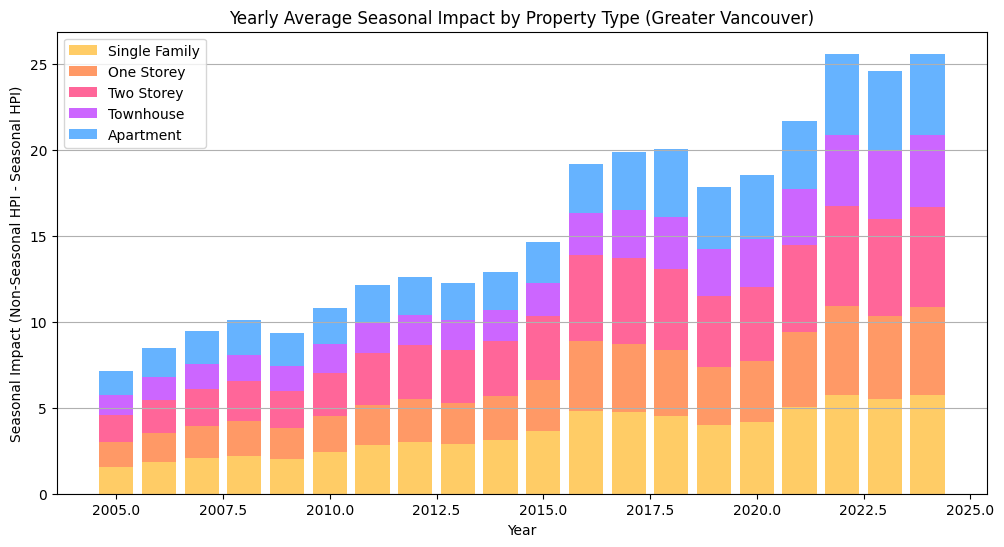

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

file_seasonally_adjusted = "../cleaned_data/cleaned_seasonality_adjust.csv"
file_not_seasonally_adjusted = "../cleaned_data/cleaned_not_seasonality_adjust.csv"

seasonally_adjusted_df = pd.read_csv(file_seasonally_adjusted)
not_seasonally_adjusted_df = pd.read_csv(file_not_seasonally_adjusted)

# Date transform to datetime type
seasonally_adjusted_df['Date'] = pd.to_datetime(seasonally_adjusted_df['Date'])
not_seasonally_adjusted_df['Date'] = pd.to_datetime(not_seasonally_adjusted_df['Date'])

# Define property types
property_types = ["Single_Family_HPI_SA", "One_Storey_HPI_SA", "Two_Storey_HPI_SA", 
                  "Townhouse_HPI_SA", "Apartment_HPI_SA"]
property_types_non_seasonal = ["Single_Family_HPI", "One_Storey_HPI", "Two_Storey_HPI", 
                               "Townhouse_HPI", "Apartment_HPI"]

# Merge data
merged_property_df = pd.merge(
    seasonally_adjusted_df[['Date'] + property_types],
    not_seasonally_adjusted_df[['Date'] + property_types_non_seasonal],
    on="Date"
)

# Compute seasonal impact (Non-Seasonal HPI - Seasonal HPI)
for sa, nsa in zip(property_types, property_types_non_seasonal):
    merged_property_df[f"{sa}_Impact"] = merged_property_df[nsa] - merged_property_df[sa]

# Calculate yearly average seasonal impact
merged_property_df["Year"] = merged_property_df["Date"].dt.year
seasonal_impact_per_property = merged_property_df.groupby("Year")[[f"{ptype}_Impact" for ptype in property_types]].mean()

# **Remove 2025 data**
seasonal_impact_per_property = seasonal_impact_per_property[seasonal_impact_per_property.index < 2025]

# Plot **stacked bar chart**
plt.figure(figsize=(12, 6))

colors = ["#FFCC66", "#FF9966", "#FF6699", "#CC66FF", "#66B3FF"]
labels = ["Single Family", "One Storey", "Two Storey", "Townhouse", "Apartment"]

bottom_values = None
for i, property_type in enumerate(property_types):
    if bottom_values is None:
        plt.bar(seasonal_impact_per_property.index, 
                seasonal_impact_per_property[f"{property_type}_Impact"], 
                label=labels[i], color=colors[i])
        bottom_values = seasonal_impact_per_property[f"{property_type}_Impact"]
    else:
        plt.bar(seasonal_impact_per_property.index, 
                seasonal_impact_per_property[f"{property_type}_Impact"], 
                label=labels[i], color=colors[i], bottom=bottom_values)
        bottom_values += seasonal_impact_per_property[f"{property_type}_Impact"]

plt.title("Yearly Average Seasonal Impact by Property Type (Greater Vancouver)")
plt.xlabel("Year")
plt.ylabel("Seasonal Impact (Non-Seasonal HPI - Seasonal HPI)")
plt.legend()
plt.grid(axis="y")
plt.show()
